# Gaussian mixture model, marginalized

In [1]:
import pystan
import arviz
import numpy
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

The data comes from a mixture of two Gaussian distributions, with unknown means and variance. We infer means and variances of the components.

In [2]:
model = """
data {
 int<lower = 0> N;
 real y[N];
}

parameters {
  vector[2] mu;
  real<lower=0> sigma[2];
}

model {
 mu ~ normal(0, 10);
 sigma ~ lognormal(0, 10);
 for (n in 1:N)
   target += log_mix(0.5,
                     normal_lpdf(y[n] | mu[1], sigma[1]),
                     normal_lpdf(y[n] | mu[2], sigma[2]));
}
"""

In [3]:
gmm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1019bdc5a953977d661c132666b8e89e NOW.


A sample data set of 100 samples was sampled from a mixture of two Gaussians, (-1, 0.5) and (1, 0.5), with equal probability of the components.

In [ ]:
data = {'N':100, 'y': [
   -1.60564, -0.738428,  -0.788214,  0.937411,   1.53427,   0.35158,
  -0.444381,  -1.09564,   -1.07968,   1.13274,  -1.04355,   1.21524,
   -1.35582,  -0.74066,   0.528229,   1.25935,  0.721489,  -1.06725,
   -1.34502,    0.4119,   -1.97636,  0.752167,  0.486281,  -1.87411,
  -0.625002, -0.919676,  -0.894819,  0.802185,  0.860323,  0.975193,
  -0.026451,  -1.51903,   0.987756,  -1.72042,  0.634612,   0.82017,
   -1.49205,   1.32449,    1.18504, -0.940458,  0.485705, -0.280229,
  -0.992136,   1.09174,  -0.423164,  0.718245,  -0.12715,  -1.03373,
    1.54556,   1.25899,   -1.28084,  0.292382,    1.2145,  -1.15795,
  -0.619497,  0.705425,   -1.03937, -0.818351, -0.182193,   1.12688,
   0.958279,  -1.05844,    1.38741,  -1.12127,   1.87585,  -1.21096,
  -0.395627,  0.100013,  -0.330039,   1.57763, -0.483199,  -1.29242,
    1.22465,  0.704068,    1.22055,  0.549211,  -2.18188,   0.84413,
    1.25785,   1.08137,   -1.20413,  -1.73943,  -1.16638,  -1.58065,
   0.732626,   1.19044,    1.32647, -0.298011,  0.453978,  -0.84684,
    1.31712,  0.296836,   -1.50797, -0.960349,   -1.0115,  -1.09435,
  -0.537644,  0.163917, -0.0490216,  -1.13458
]}

Let us plot the histogram of the data set to visualize the data.

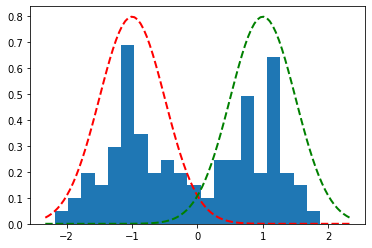

In [7]:
plt.hist(data['y'], bins=20, density=True)
x = numpy.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
plt.plot(x, norm.pdf(x, loc=-1, scale=0.5), 'r--', lw=2)
plt.plot(x, norm.pdf(x, loc=1, scale=0.5), 'g--', lw=2)

The actual posterior distribution will differ slightly from the distribution we sampled from because of finite sample size.

In [6]:
fit = gmm.sampling(data=data, iter=1000, chains=4, init=lambda: {'mu': [-2, 2], 'sigma': [1, 1]})

KeyboardInterrupt: 

In [ ]:
print(fit)

In [ ]:
arviz.plot_trace(fit)